In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn import tree

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
len(df)

303

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
X = df.drop(['target'], axis = 1)
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [7]:
sc = StandardScaler(with_mean=False)

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## SVM_linear

In [8]:
import time
start_time = time.time()

svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train_scaled, Y_train)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 0.042387962341308594 seconds


## SVM_rbf 

In [9]:
start_time = time.time()

svm_classifier_rbf = SVC(kernel='rbf', probability=True)
svm_classifier_rbf.fit(X_train_scaled, Y_train)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 0.03143143653869629 seconds


## conf_m of svm_linear & svm_rbf

In [10]:
def report(classifier):    
    y_pred = classifier.predict(X_test_scaled)

    accuracy = accuracy_score(Y_test, y_pred)
    conf_m = confusion_matrix(Y_test, y_pred)
    report = classification_report(Y_test, y_pred)

    print(f"Accuracy: {accuracy}")

    print(f"Classification Report:")
    print(report)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=classifier.classes_)
    disp.plot()
    plt.show()

Accuracy: 0.8131868131868132
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



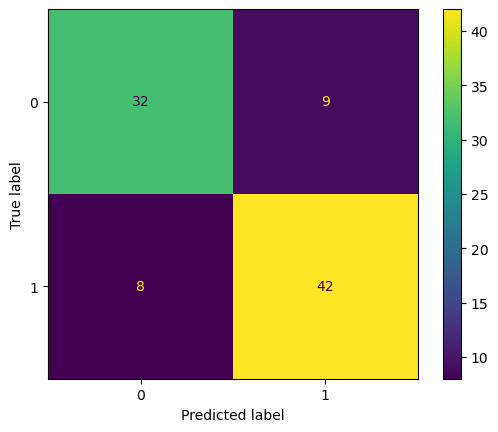

In [11]:
report(svm_classifier)

Accuracy: 0.8351648351648352
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



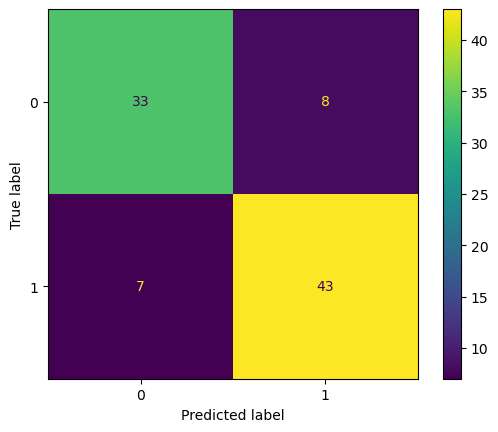

In [12]:
report(svm_classifier_rbf)

## Classification Visualization 

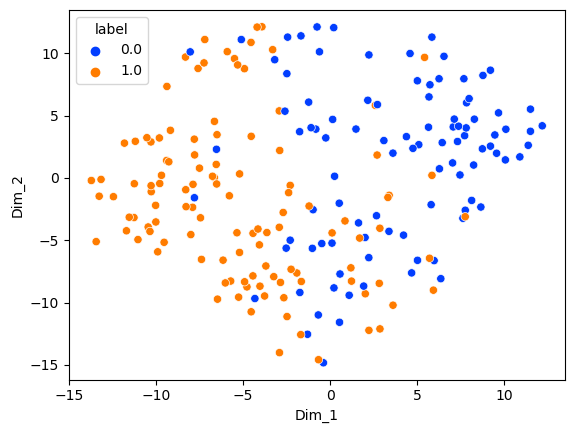

In [13]:
data_1000 = X_train_scaled[0:1000, :]
labels_1000 = Y_train.iloc[0:1000]

# Применение t-SNE
model_tsne = TSNE(n_components=2, random_state=0, init='random')
tsne_data = model_tsne.fit_transform(data_1000)

# Создание нового DataFrame для визуализации
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Визуализация результатов t-SNE
sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
plt.show()

In [14]:
def TSNE_plot(model_clf, text):
    model_svm_linear = model_clf
    model_svm_linear.fit(data_1000, labels_1000)

    # Get the model's predictions or transformed features (replace with your features)
    transformed_data = model_svm_linear.predict_proba(data_1000)

    # Configure and fit t-SNE with init="random"
    tsne_model = TSNE(n_components=2, random_state=0, init='random')
    tsne_data = tsne_model.fit_transform(transformed_data)

    # Create a new DataFrame for the result
    tsne_data = np.vstack((tsne_data.T, labels_1000)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

    # Plotting the result of t-SNE
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(text)
    plt.legend()
    plt.show()

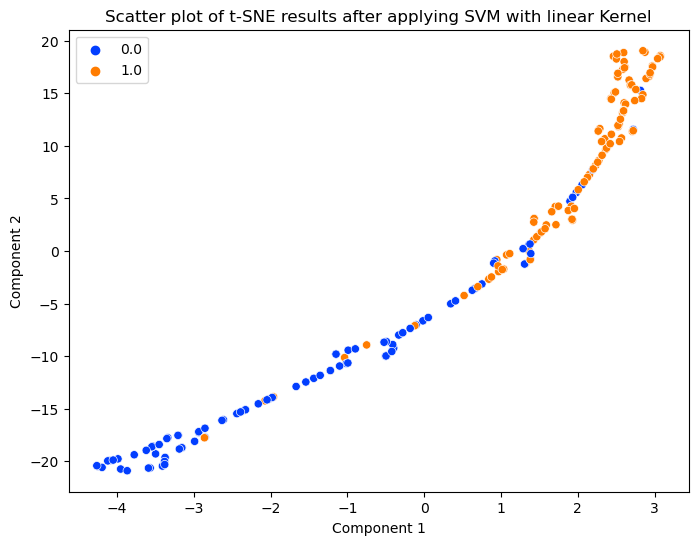

In [15]:
TSNE_plot(SVC(kernel='linear', probability=True), "Scatter plot of t-SNE results after applying SVM with linear Kernel")

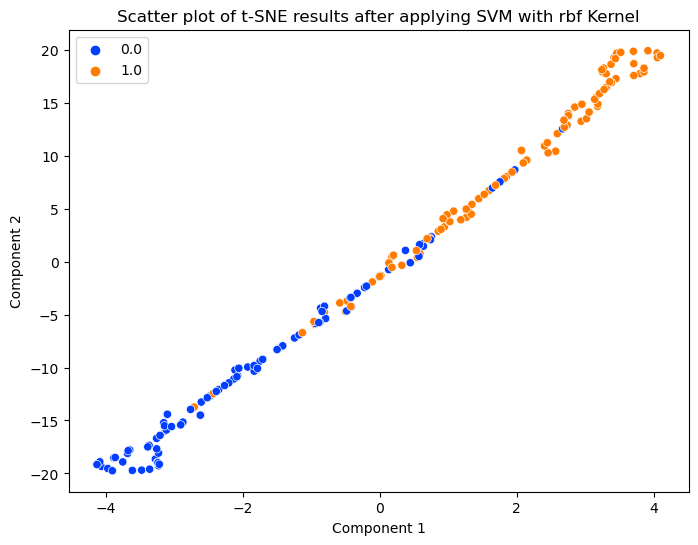

In [16]:
TSNE_plot(SVC(kernel='rbf', probability=True),"Scatter plot of t-SNE results after applying SVM with rbf Kernel")

## Decision Tree

In [17]:
start_time = time.time()

DT_clf = tree.DecisionTreeClassifier()
DT_clf = DT_clf.fit(X_train_scaled, Y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 0.05396246910095215 seconds


Accuracy: 0.7252747252747253
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72        41
           1       0.79      0.68      0.73        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.73      0.73      0.73        91



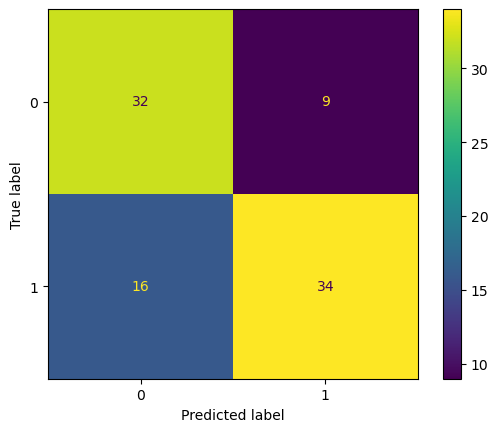

In [18]:
report(DT_clf)

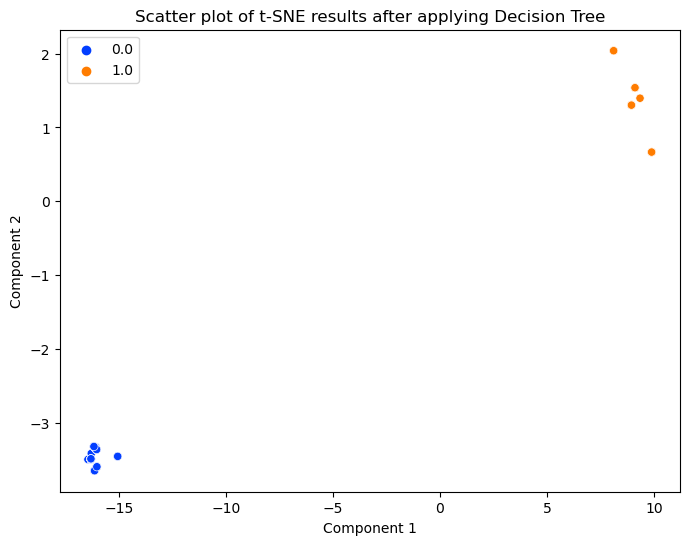

In [19]:
TSNE_plot(tree.DecisionTreeClassifier(), "Scatter plot of t-SNE results after applying Decision Tree")

## Random Forest 

In [20]:
start_time = time.time()

rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(X_train_scaled, Y_train)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 0.19591879844665527 seconds


Accuracy: 0.8351648351648352
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



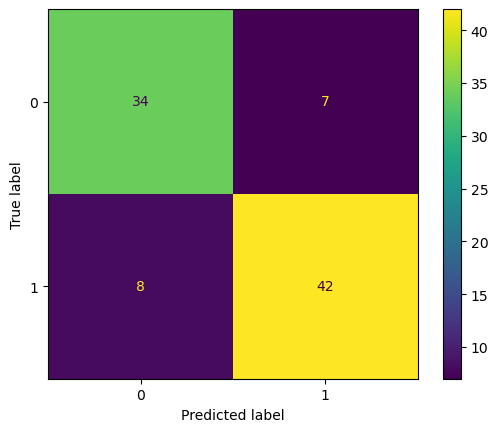

In [21]:
report(rf_classifier)

In [22]:
y_pred_train = rf_classifier.predict(X_train_scaled)
accuracy = accuracy_score(Y_test, y_pred_train[:91])
print(f"Accuracy: {accuracy}")

Accuracy: 0.5274725274725275


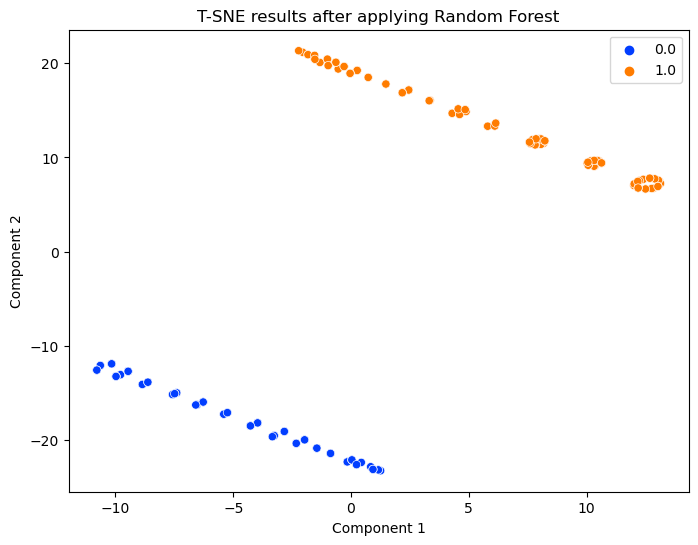

In [23]:
TSNE_plot(RandomForestClassifier(n_estimators=50, random_state=42), "T-SNE results after applying Random Forest")

## LogReg 

In [24]:
start_time = time.time()

model_regr = LogisticRegression(random_state=42)
model_regr.fit(X_train_scaled, Y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 0.06795287132263184 seconds


Accuracy: 0.8131868131868132
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



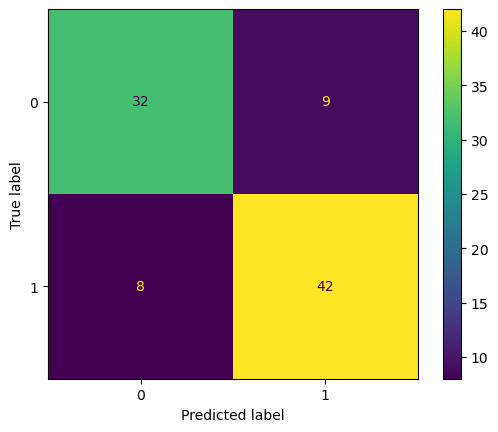

In [25]:
report(model_regr)

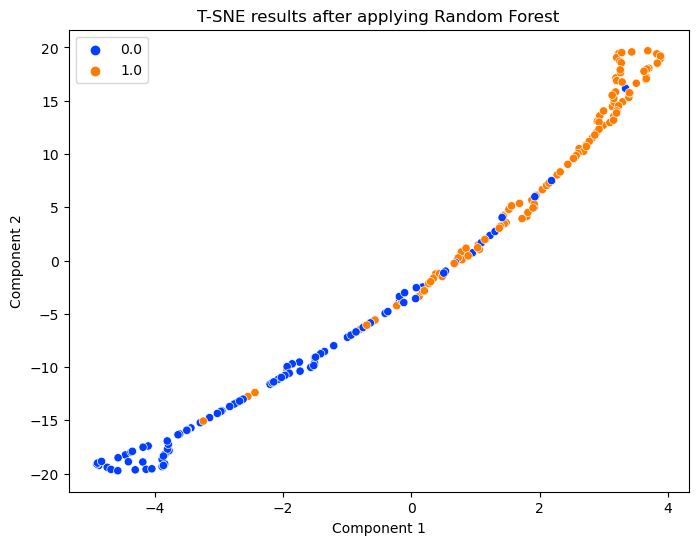

In [26]:
TSNE_plot(LogisticRegression(random_state=42), 'T-SNE results after applying Random Forest')

## Gaussian Naive Bayes 

In [27]:
start_time = time.time()

model_nb = GaussianNB()
model_nb.fit(X_train_scaled, Y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 0.004995822906494141 seconds


Accuracy: 0.8351648351648352
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



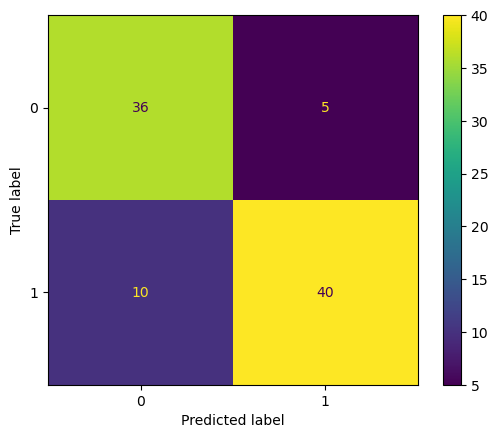

In [28]:
report(model_nb)

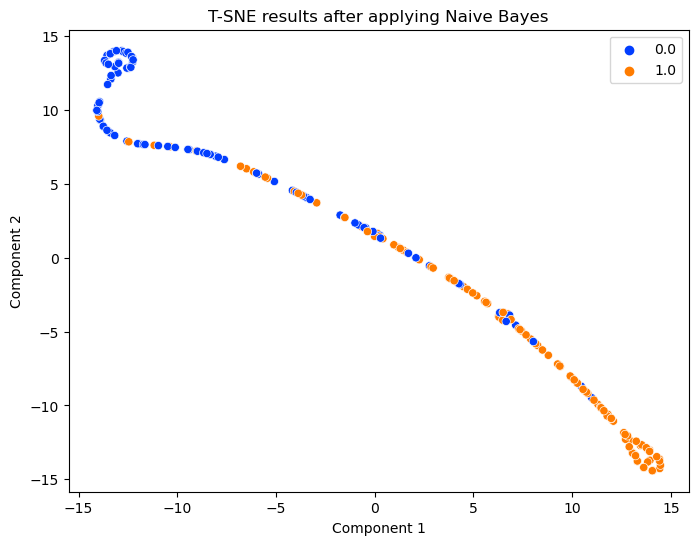

In [29]:
TSNE_plot(GaussianNB(), "T-SNE results after applying Naive Bayes")

## KNN 

In [30]:
start_time = time.time()

model_knn = KNeighborsClassifier(n_neighbors = 4) 
model_knn.fit(X_train.values, Y_train.values)

end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 0.0049970149993896484 seconds


Accuracy: 0.45054945054945056
Classification Report:
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        41
           1       0.00      0.00      0.00        50

    accuracy                           0.45        91
   macro avg       0.23      0.50      0.31        91
weighted avg       0.20      0.45      0.28        91



C:\Users\Murad Mammadzade\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Murad Mammadzade\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Murad Mammadzade\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


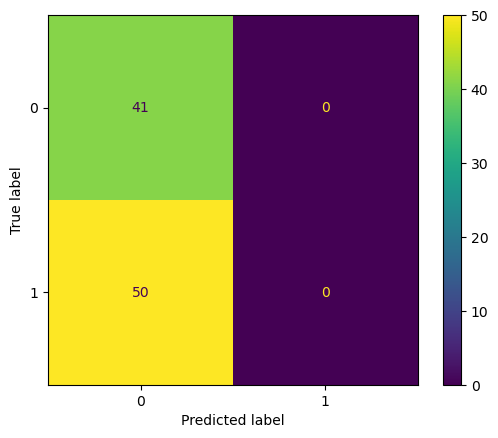

In [31]:
report(model_knn)

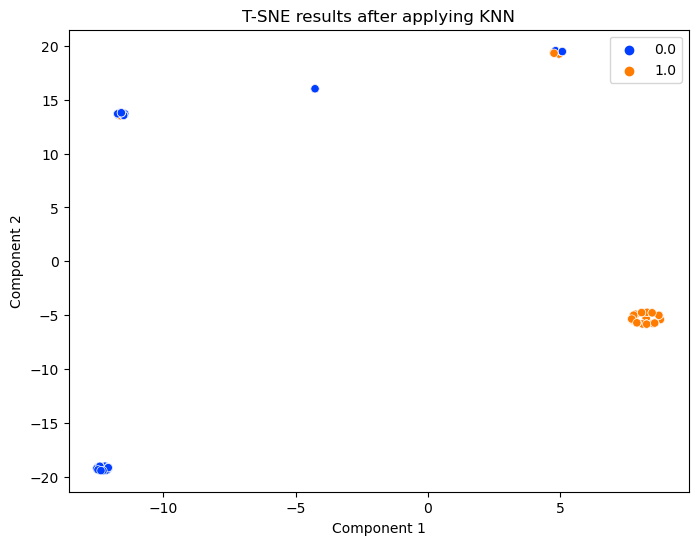

In [32]:
TSNE_plot(KNeighborsClassifier(n_neighbors = 4), "T-SNE results after applying KNN")

## Table of used models and their performance

| Algorithm             | Accuracy | Standard Scaler | Training Time  | Hyperparameters |
|-----------------------|:--------:|:---------------:|:--------------:|:----------------|
| SVM_linear            | 81%      | Yes             | 0.04 sec       | kernel='linear' |
| SVM_rbf               | 83%      | Yes             | 0.12 sec       | kernel='rbf'    |
| Random Forest         | 83%      | Yes             | 0.185 sec      | n_estimators=50 |
| Decision Tree         | 70%      | Yes             | 0.008sec       | -               |
| GaussianNB            | 83%      | Yes             | 0.07 sec       | -               |
| LogReg                | 81%      | Yes             | 0.09 sec       | -               |
| KNN                   | 45%      | Yes             | 0.006 sec      | -               |
